In [152]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
#from patchify import patchify, unpatchify
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff
from tifffile import imread, imwrite
from skimage.transform import resize
from tifffile import imread, imwrite
from skimage.transform import resize


In [169]:
#path to images 
image_directory='/path/to/images/'

#path to masks 
mask_directory='/path/to/masks/'

images = os.listdir(image_directory)
masks = os.listdir(mask_directory)


In [172]:
SIZE = 256
image_dataset = []
mask_dataset = []

In [ ]:
all_mask_patches = []
all_img_patches = []

for i, mask_name in enumerate(masks):
        #Remember enumerate method adds a counter and returns the enumerate object
        if (mask_name.split('.')[1] == 'tif'):

            temp_image=tiff.imread(image_directory+mask_name)
            temp_mask=tiff.imread(mask_directory+mask_name)
            temp_image = resize(temp_image, (256, 256))
            temp_mask = resize(temp_mask, (256, 256))



            if(True):
                all_img_patches.append(temp_image)
                if(len(temp_mask.shape)==3):
                    all_mask_patches.append(temp_mask[:,:,0])
                
                else:
                    all_mask_patches.append(temp_mask)

In [174]:
images = np.array(all_img_patches)
images = np.squeeze(images)

In [175]:
masks = np.array(all_mask_patches)
masks = np.squeeze(masks)

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=1)

In [ ]:
#Sanity check, view few mages
import random
import numpy as np
for i in range(100):
    image_number = random.randint(0, len(X_train)-1)
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(np.reshape(X_train[image_number], (SIZE, SIZE,4)), cmap='gray')
    plt.subplot(122)
    plt.imshow(np.reshape(y_train[image_number], (SIZE, SIZE,1)), cmap='gray', vmin=0, vmax=1)
    plt.show()

In [178]:
from unet_model import unet_model 

IMG_HEIGHT = images.shape[1]
IMG_WIDTH  = images.shape[2]
IMG_CHANNELS = images.shape[3]

def get_model():
    return unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = get_model()

1e-06
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 4) 0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 256, 256, 16) 592         input_4[0][0]                    
__________________________________________________________________________________________________
dropout_27 (Dropout)            (None, 256, 256, 16) 0           conv2d_57[0][0]                  
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 256, 256, 16) 2320        dropout_27[0][0]                 
______________________________________________________________________________________

In [144]:
import sys,os,os.path
os.environ["HDF5_USE_FILE_LOCKING"]="FALSE"

In [179]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("rotate+flip.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_freq='epoch')

## TRAINING 

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 1, 
                    epochs=1, 
                    verbose=1, 
                    validation_data=(X_val, y_val), 
                    shuffle=True,
                    callbacks=[checkpoint])

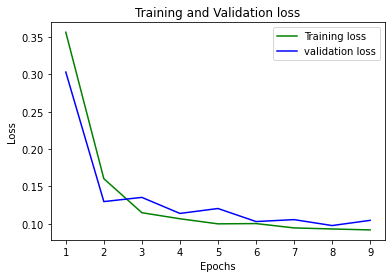

In [181]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
#Evaluate the model

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

13/13 [==============================] - 194s 8s/step - loss: 0.0302 - accuracy: 0.9916
Accuracy =  99.15986657142639 %


In [18]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5
y_pred_sq=np.squeeze(y_pred_thresholded)
intersection = np.logical_and(y_test, y_pred_sq)
union = np.logical_or(y_test, y_pred_sq)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)


IoU socre is:  0.948716079884223


## Load saved model and Visualize some predictions 


In [35]:
from unet_model import unet_model 
def get_model():
    return unet_model(SIZE,SIZE, 4)
model_loaded = get_model()
model_loaded.load_weights('Aug23.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 4) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 16) 592         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 256, 256, 16) 0           conv2d_19[0][0]                  
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 16) 2320        dropout_9[0][0]                  
____________________________________________________________________________________________